In [1]:
from frechet_fda.data_generation_helpers import (
    make_truncnorm_pdf,
    gen_params_scenario_one,
)
from frechet_fda.distribution_tools import (
    make_distribution_objects
)

In [2]:
mus, sigmas = gen_params_scenario_one(200)

In [3]:
pdfs = make_truncnorm_pdf(-3, 3, mus, sigmas)

C:\Coding\thesis_frechet_fda\src\frechet_fda\data_generation_helpers.py:62: UserWarning: Not all provided densities integrate to 1 with tolerance 1e-05!
 Max case of deviation is: 0.00045366913409794485
 In position: 40
 Performing normalization...
  warnings.warn(


In [4]:
my_pdfs = make_distribution_objects(*pdfs)
my_cdfs = [pdf.integrate() for pdf in my_pdfs]
my_qfs = [cdf.invert() for cdf in my_cdfs]
my_qds = [qf.differentiate() for qf in my_qfs]

C:\Coding\thesis_frechet_fda\src\frechet_fda\numerics_helpers.py:36: RuntimeWarning: divide by zero encountered in divide
  d_y[:-1] = np.diff(y_vals) / np.diff(d_x)


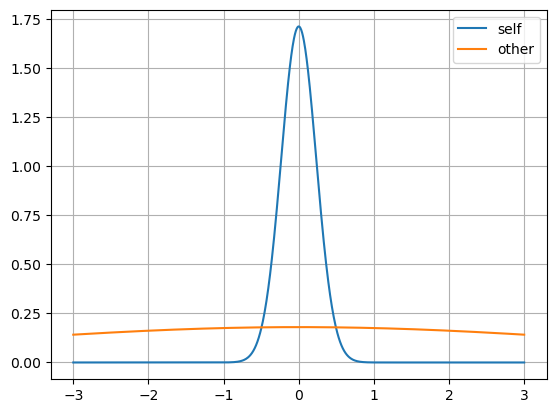

In [5]:
min_sigma = sigmas.argmin()
max_sigma = sigmas.argmax()
my_pdfs[min_sigma].compare(my_pdfs[max_sigma])

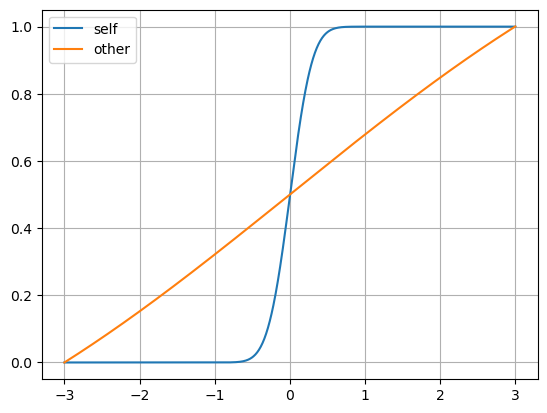

In [6]:
my_cdfs[min_sigma].compare(my_cdfs[max_sigma])

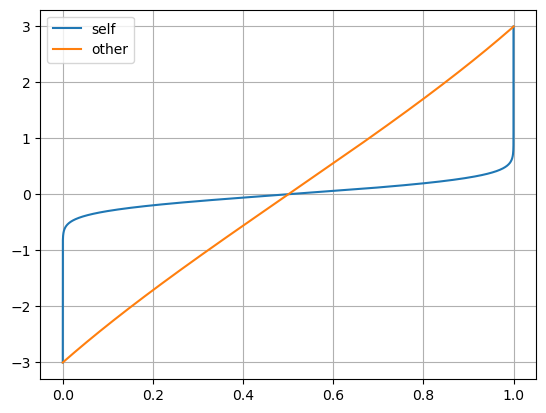

In [7]:
my_qfs[min_sigma].compare(my_qfs[max_sigma])

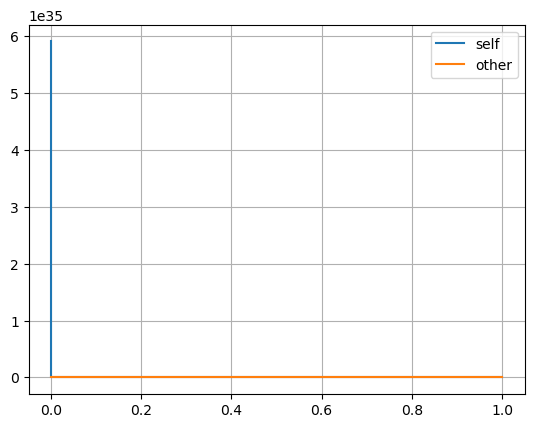

In [8]:
my_qds[min_sigma].compare(my_qds[max_sigma])

C:\Coding\thesis_frechet_fda\src\frechet_fda\distribution_class.py:103: RuntimeWarning: invalid value encountered in subtract
  return Distribution(x,y-np.mean(y))


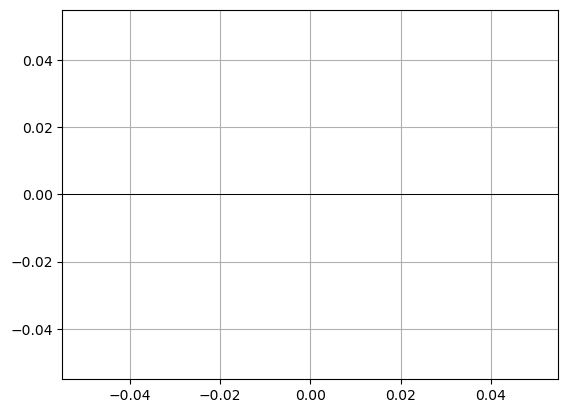

In [29]:
my_qds[min_sigma].vcenter().plot()

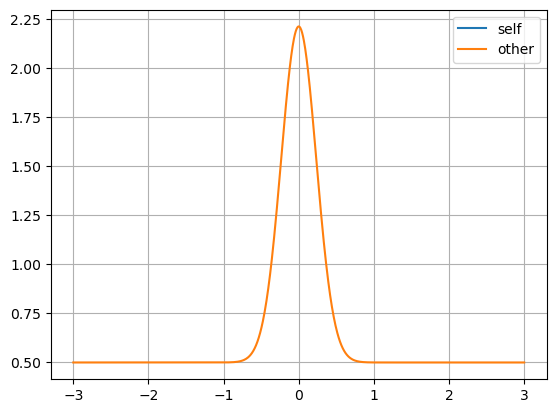

In [17]:
# Kinda sus
temp = my_pdfs[min_sigma]
for _ in range(100):
    temp = temp.integrate()
    temp = temp.invert()
    temp = temp.differentiate()
    temp = temp.integrate()
    temp = temp.vcenter().invert()
    temp = temp.differentiate()
temp.compare(my_pdfs[min_sigma] + 0.5)

In [10]:
qdf = my_pdf.integrate().invert().differentiate()
qdf.plot()
qdf.y[0], qdf.y[-1]

NameError: name 'my_pdf' is not defined

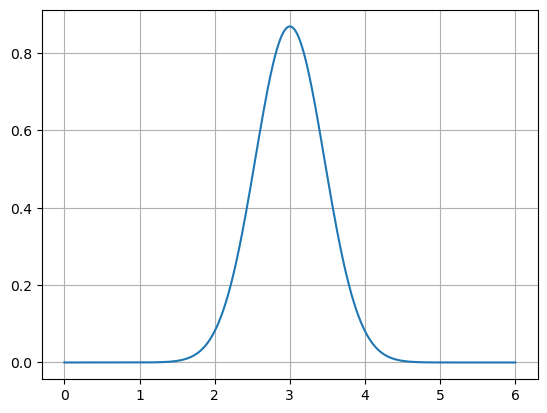

In [ ]:
pdf_temp = qdf.integrate().invert().differentiate()
pdf_temp.plot()

In [ ]:
lqdf = qdf.log()

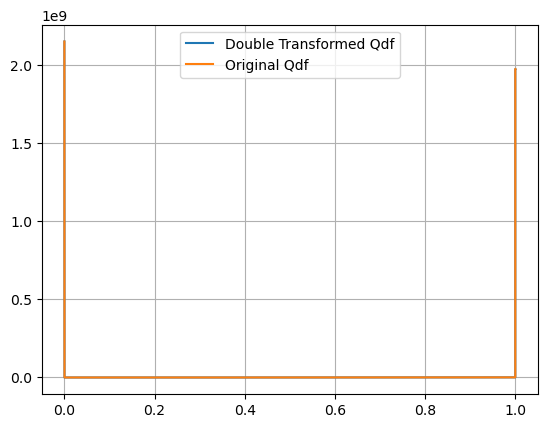

In [ ]:
qdf2 = lqdf.exp()
qdf2.compare(qdf, "Double Transformed Qdf", "Original Qdf")